# EDA Of Diwali Sales Data - Prathamesh Jadhav

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Diwali Sales Data.csv", encoding = "unicode_escape")

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [6]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.shape

(11251, 13)

In [8]:
#drop null values
df.dropna(inplace=True)

In [9]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df.shape

(11239, 13)

In [11]:
#change data type of Amount column
df["Amount"] = df["Amount"].astype("int")

In [12]:
df["Amount"].dtypes

dtype('int64')

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df.describe() 

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Data Visualization

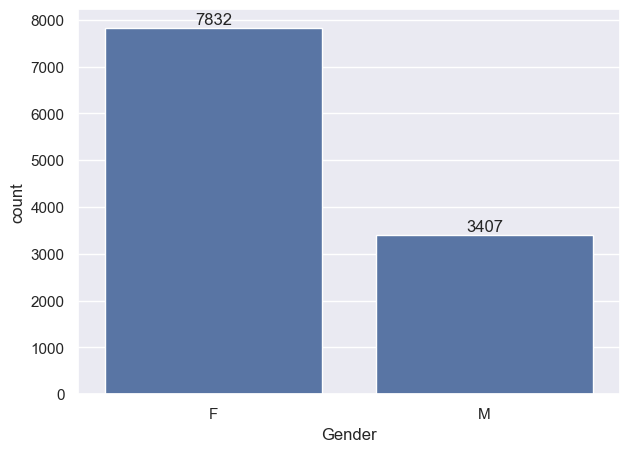

In [90]:
ax = sns.countplot(data = df, x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [38]:
sales_gen = (
    df.groupby(by = "Gender")
    .agg({"Amount" : "sum"})
    .sort_values(by = "Amount", ascending = False)
)
sales_gen

,Amount
Gender,
F,74335853
M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

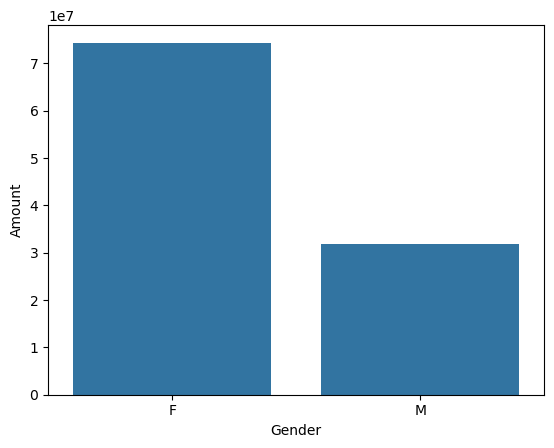

In [39]:
sns.barplot(data = sales_gen, x="Gender", y="Amount")

From above graphs we can see most of the buyers are females and even the purchasing power of females are greater than man

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

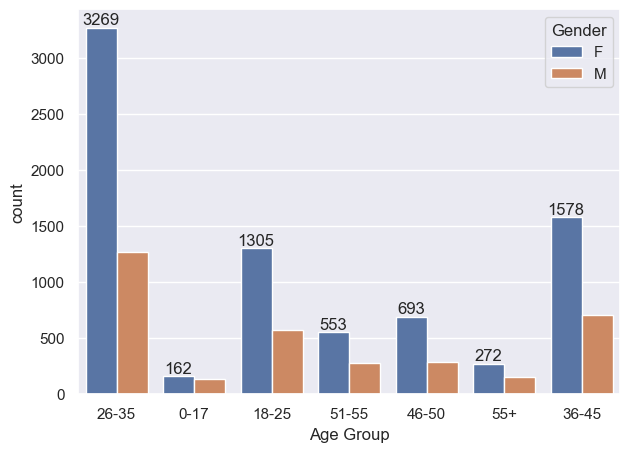

In [88]:
ax = sns.countplot(data = df, x="Age Group", hue= "Gender")
ax.bar_label(ax.containers[0])
plt.show()

In [43]:
#Total amount vs age group
sales_age =(
    df.groupby(by = "Age Group", as_index = False)
    .agg({"Amount" : "sum"})
    .sort_values(by = "Amount", ascending = False)
)

In [44]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


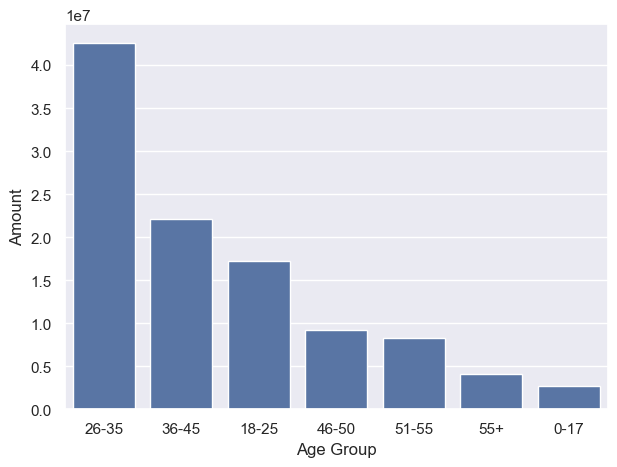

In [91]:
sns.barplot(data = sales_age, x = "Age Group", y ="Amount")
plt.show()

From above graphs we can see that most of the buyers are of age group between 26-35yrs female

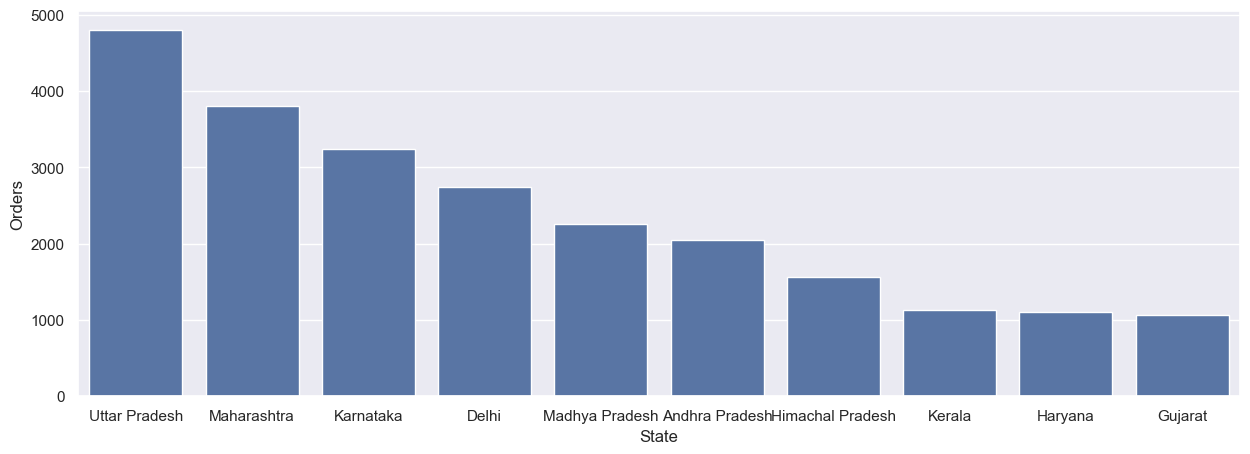

In [92]:
# total number of orders from top 10 states
plt.figure(figsize = (15,5))
sales_state =(
    df.groupby(by = "State", as_index = False)
    .agg({"Orders" : "sum"})
    .sort_values(by = "Orders", ascending = False)
    .head(10)
)
sns.barplot(data = sales_state, x= "State", y= "Orders")
plt.show()

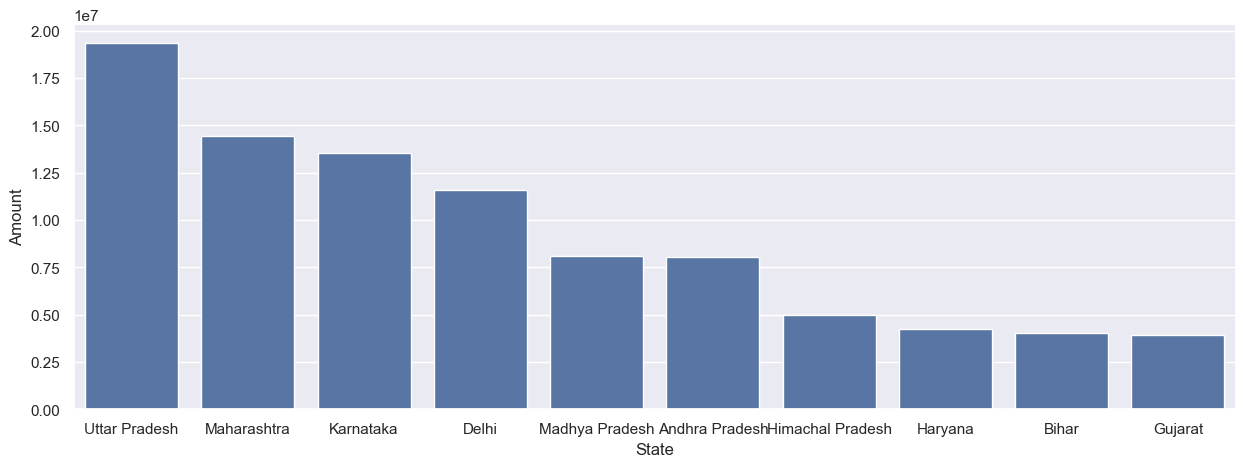

In [93]:
# total amount/sales from top 10 states
plt.figure(figsize=(15,5))
sales_state =(
    df.groupby(by = "State", as_index=False)
    .agg({"Amount": "sum"})
    .sort_values(by = "Amount", ascending=False)
    .head(10)
)
sns.barplot(data = sales_state, x="State", y= "Amount")
plt.show()

From above graphs we can see that most of the orders & total sale/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

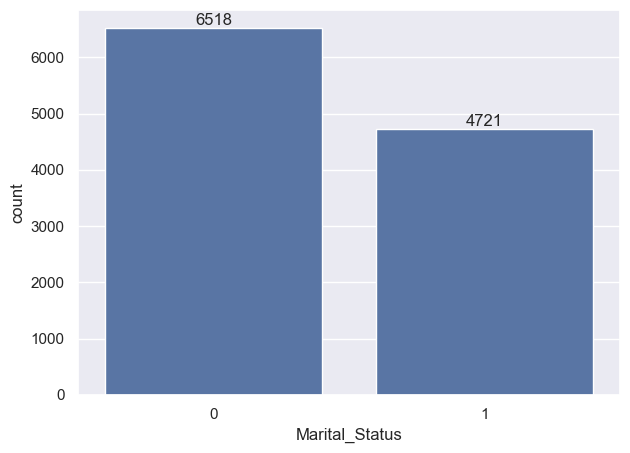

In [84]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data = df, x= "Marital_Status")
ax.bar_label(ax.containers[0])
plt.show()

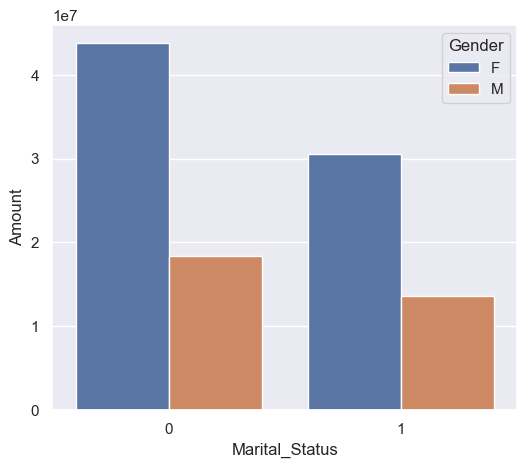

In [83]:
plt.figure(figsize=(6,5))
sales_state =(
    df.groupby(by = ["Marital_Status", "Gender"], as_index=False)
    .agg({"Amount" : "sum"})
    .sort_values(by = "Amount", ascending = False)
)
sns.barplot(data = sales_state, x = "Marital_Status", y = "Amount", hue= "Gender")
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

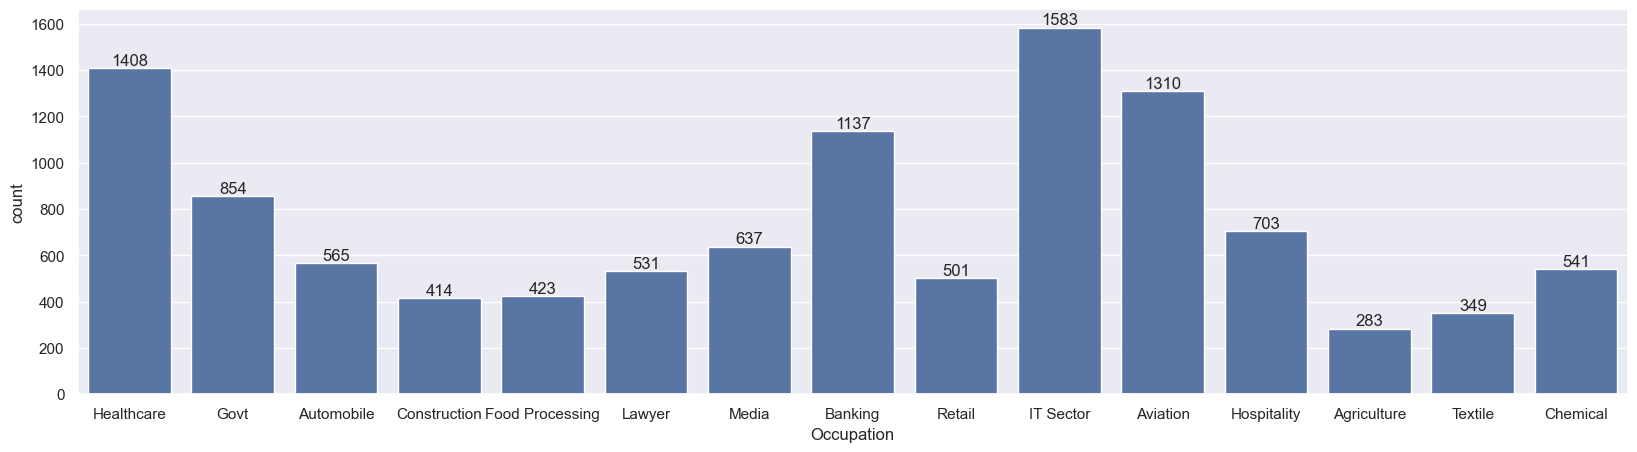

In [67]:
plt.figure(figsize = (20,5))
ax = sns.countplot(data = df, x = "Occupation")
ax.bar_label(ax.containers[0])
plt.show()  

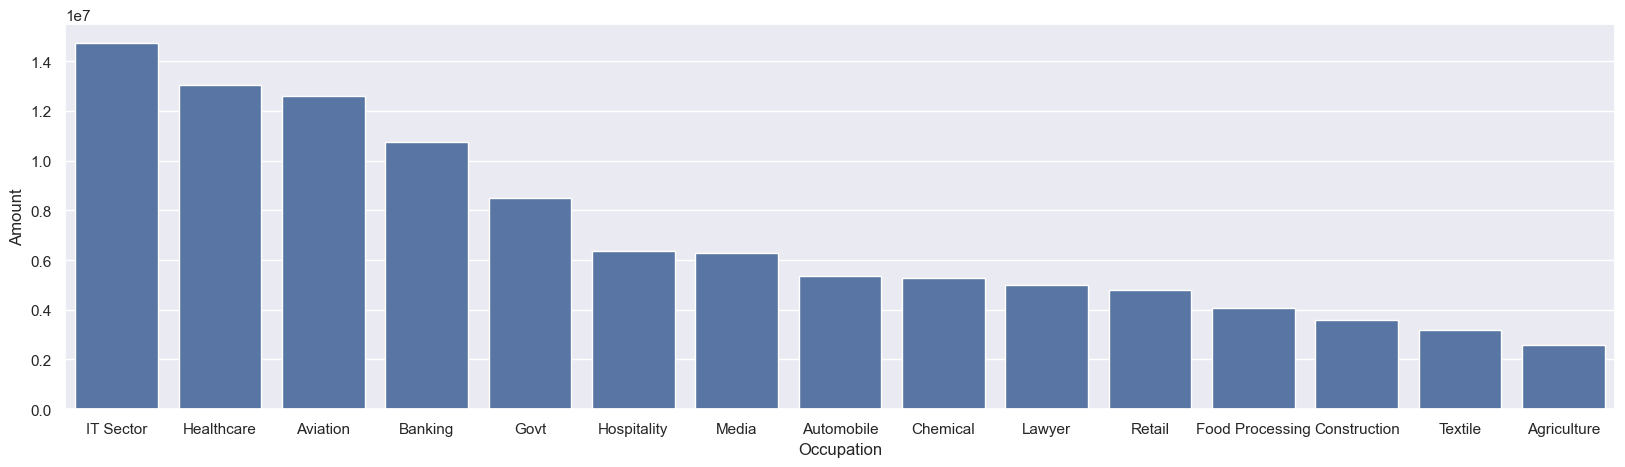

In [74]:
plt.figure(figsize=(20,5))
sales_state =(
    df.groupby(by = "Occupation")
    .agg({"Amount" : "sum"})
    .sort_values(by = "Amount", ascending = False)
)
sns.barplot(data = sales_state, x = "Occupation", y = "Amount")
plt.show()

From above graphs we can see that most of hte buyers are working in IT, Healthcare and Aviation sector.

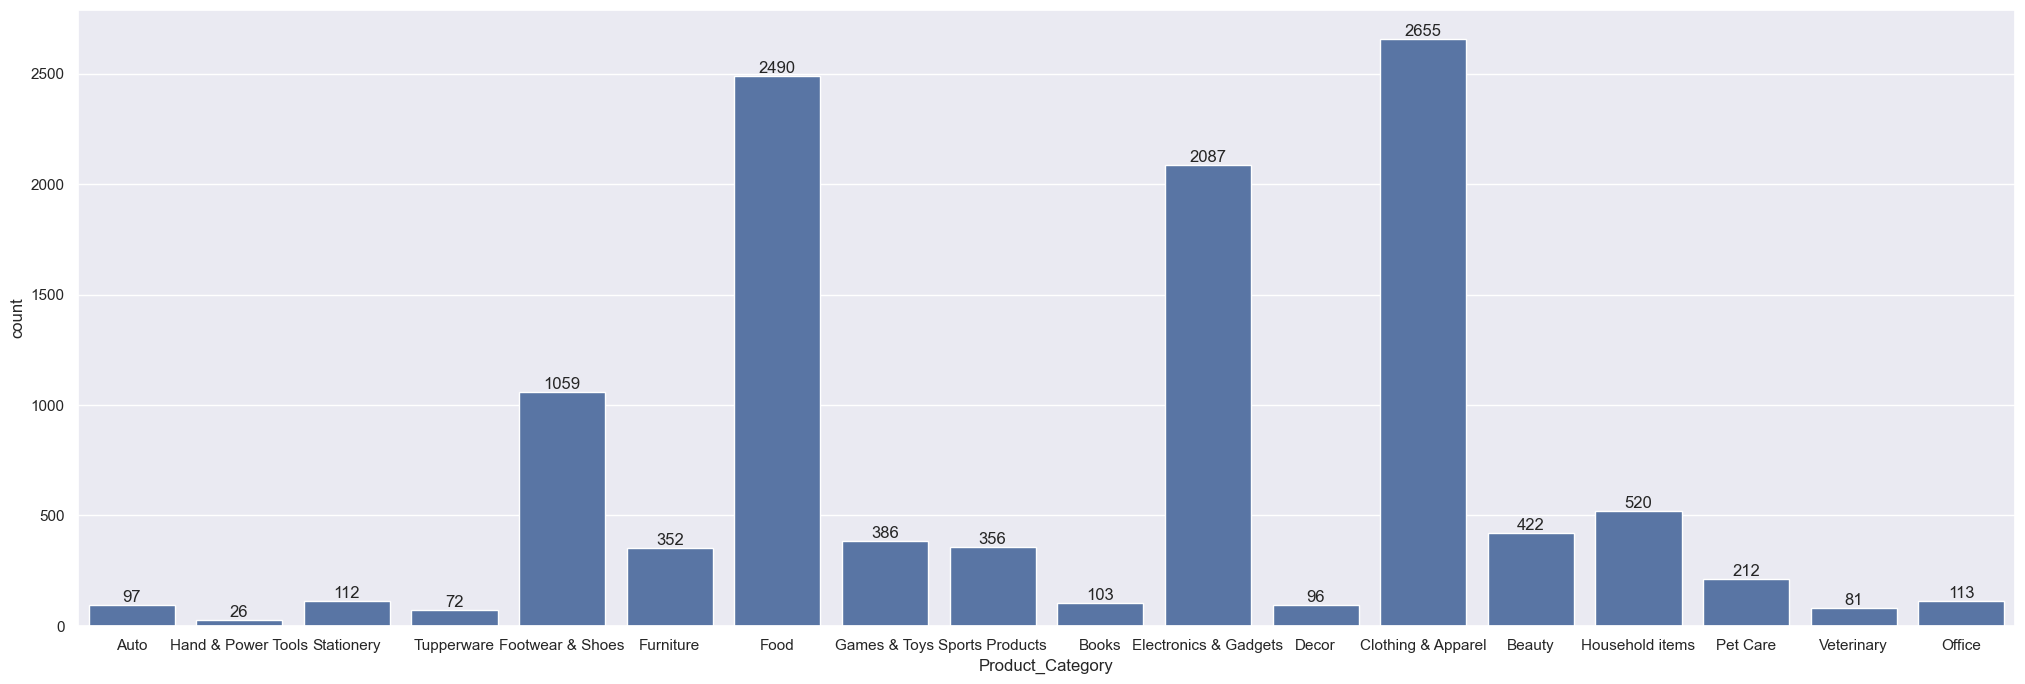

In [79]:
plt.figure(figsize = (25,8))

ax = sns.countplot(data = df, x = "Product_Category")
ax.bar_label(ax.containers[0])
plt.show()

<Axes: xlabel='Product_Category', ylabel='Amount'>

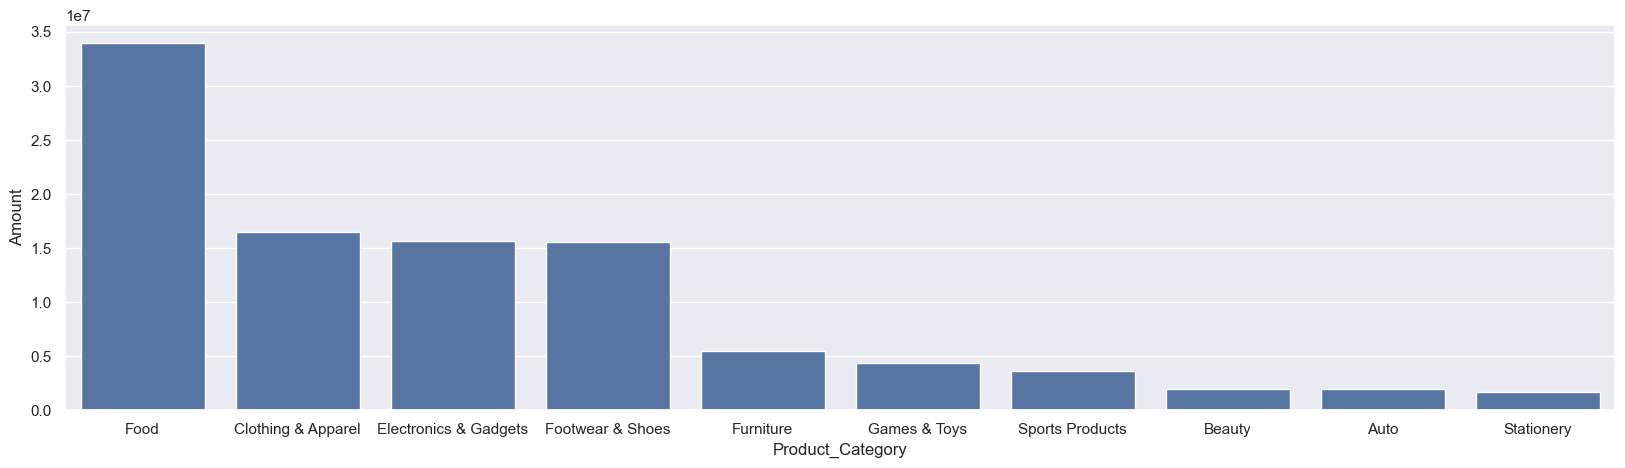

In [81]:
plt.figure(figsize = (20,5))
sales_state =(
    df.groupby(by = "Product_Category")
    .agg({"Amount" : "sum"})
    .sort_values(by = "Amount", ascending = False)
    .head(10)
)
sns.barplot(data = sales_state, x= "Product_Category", y= "Amount")

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

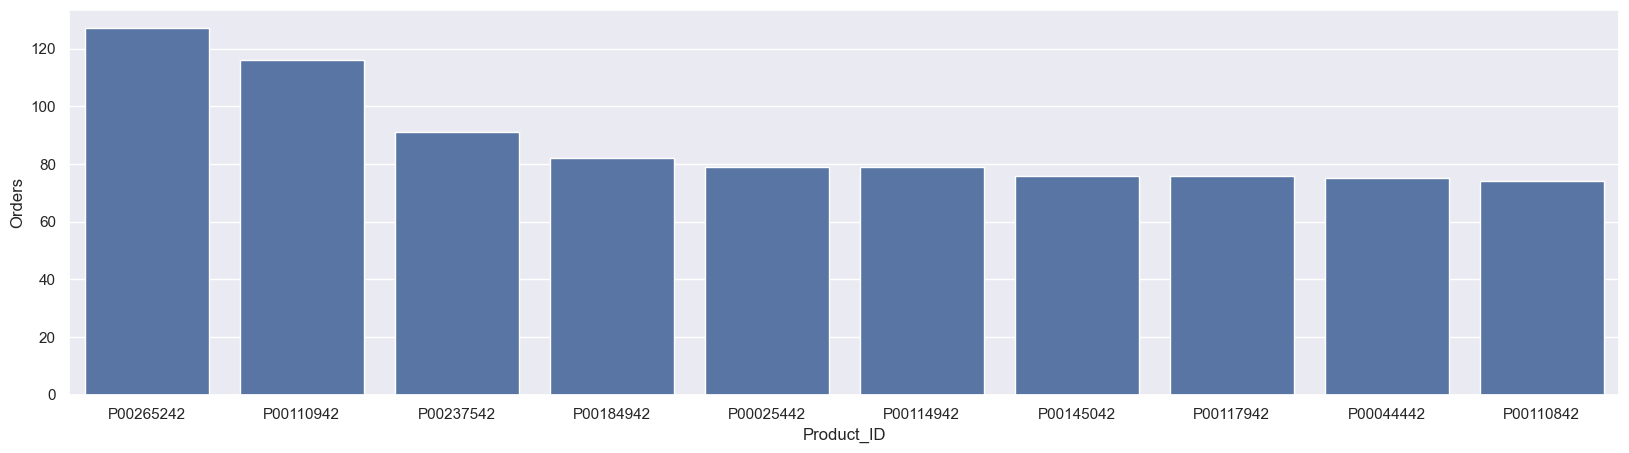

In [82]:
plt.figure(figsize=(20,5))
sales_state =(
    df.groupby(by = "Product_ID")
    .agg({"Orders" : "sum"})
    .sort_values(by = "Orders", ascending=False)
    .head(10)
)
sns.barplot(data= sales_state, x= "Product_ID", y= "Orders")

### Conclusion:
*Married women age group 26-35 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food Clothing and Electronics category*